# Analyse Outliers

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load/Read Data

In [58]:
#df_data_training = pd.read_csv("RESULTS_gridsearch_1296.csv")
#name_dataset = f'Grid1296'
#
#df_data_training = pd.read_csv("RESULTS_gridsearch_2401.csv")
#name_dataset = f'Grid2401'
#
df_data_training = pd.read_csv("RESULTS_sobolsampling-2048.csv")
name_dataset = f'Sobol-1'
#
#df_data_training = pd.read_csv("RESULTS_sobolsampling-2048-2.csv")
#name_dataset = f'Sobol-2'



#print(f'{df_data_training}')
df_data_training = df_data_training.drop(columns='Unnamed: 0')
#print(f'{df_data_training}')

colnames = df_data_training.iloc[0:6,0]
#print(f'{colnames}')
cols = []
for i in range(0,5):
    #print(f'{colnames[i]}')
    cols.append(colnames[i])
#print(f'{cols}')

data = []
for i in range(1, df_data_training.shape[1]):
    d = df_data_training.iloc[0:5,i]
    #print(f'd:\n{d}')
    tmp = []
    for j in range(0,5):
        tmp.append(float(d[j]))
    data.append(tmp)    
    #if i == 2:
    #    break

#print(f'{data}')
df_data_training = pd.DataFrame(np.array(data), columns=[cols])
#print(f'{df_data_training}')
#print(f'{df_data_training.SigC}')



#df_data_training2 = pd.read_csv("RESULTS_gridsearch_2401.csv")
#df_data_training2 = df_data_training2.drop(columns='Unnamed: 0')
#colnames2 = df_data_training2.iloc[0:6,0]
#cols2 = []
#for i in range(0,5):
    #print(f'{colnames2[i]}')
#    cols2.append(colnames2[i])
#print(f'{cols2}')
#data2 = []
#for i in range(1, df_data_training2.shape[1]):
#    d = df_data_training2.iloc[0:5,i]
    #print(f'd:\n{d}')
#    tmp = []
#    for j in range(0,5):
#        tmp.append(float(d[j]))
#    data2.append(tmp)    
    #if i == 2:
    #    break
#df_data_training2 = pd.DataFrame(np.array(data2), columns=[cols2])
#print(f'{df_data_training2}')
#print(f'{df_data_training2.SigC}')

In [59]:
#print(f'{df_data_training}')
#print(f'min SigC: {min(df_data_training["SigC"].to_numpy())}')
#print(f'max SigC: {max(df_data_training["SigC"].to_numpy())}\n')

#print(f'min SigH: {min(df_data_training["SigH"].to_numpy())}')
#print(f'max SigH: {max(df_data_training["SigH"].to_numpy())}\n')

#print(f'min EpsC: {min(df_data_training["EpsC"].to_numpy())}')
#print(f'max EpsC: {max(df_data_training["EpsC"].to_numpy())}\n')

#print(f'min EpsH: {min(df_data_training["EpsH"].to_numpy())}')
#print(f'max EpsH: {max(df_data_training["EpsH"].to_numpy())}\n')

## Boxplots

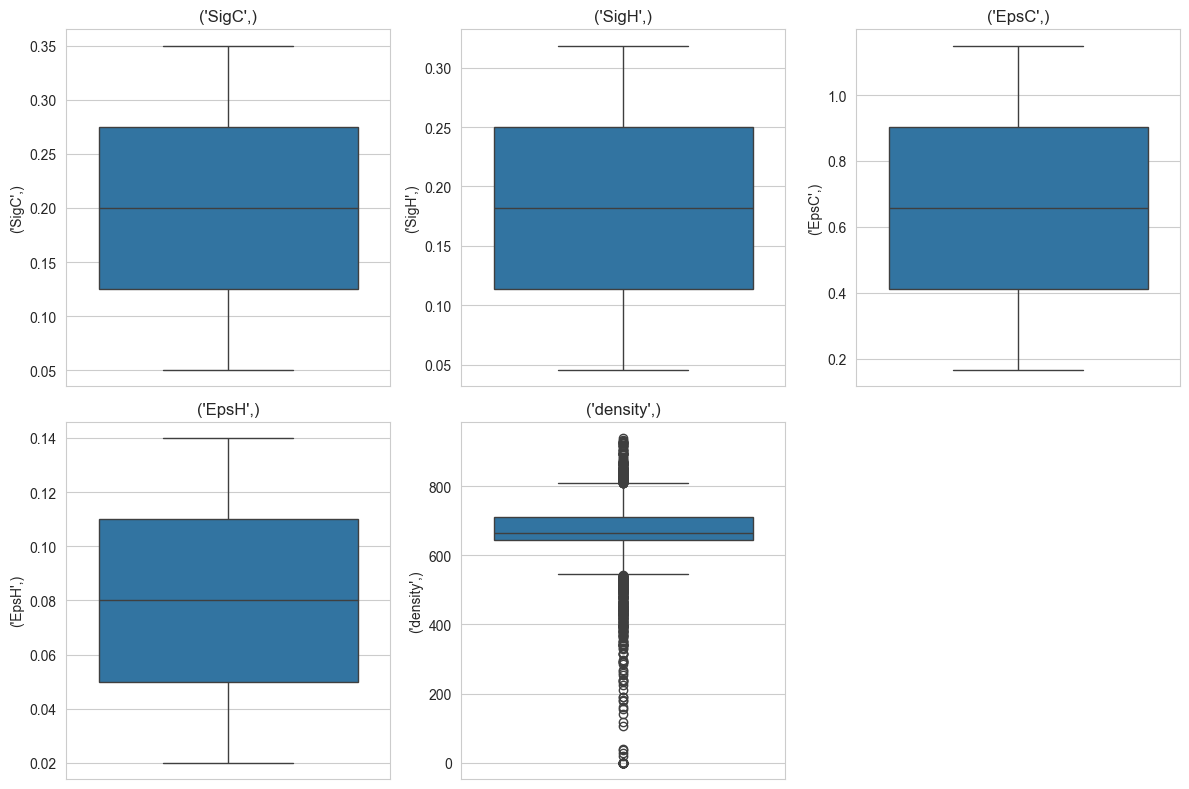

In [60]:
sns.set_style("whitegrid")
sns.color_palette("Set1")

plt.figure(figsize=(12, 8))
for i, column in enumerate(df_data_training.columns, 1):
    #print(f'i = {i}')
    #print(f'column = {column}')
    plt.subplot(2, 3, i)
    sns.boxplot(df_data_training[column])
    plt.title(column)

plt.tight_layout()
plt.show()

## Density Histogram

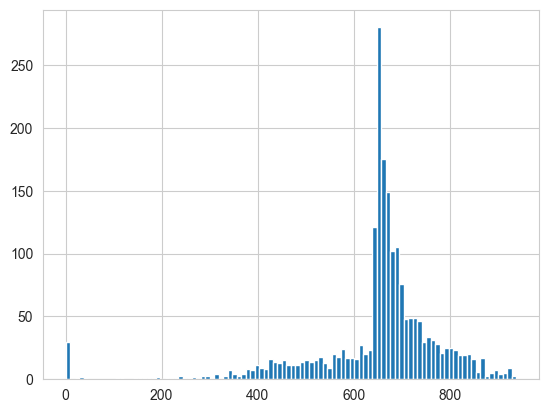

In [61]:
n_bins = 1000
plt.figure()
#plt.hist(df_data_training['density'], bins=n_bins)
plt.hist(df_data_training['density'], bins=100)
plt.show()

## violin plot

C:\Users\W0rsth0rst\AppData\Local\Temp\ipykernel_13344\2789003111.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  violin_plot.set_xticklabels([f''])


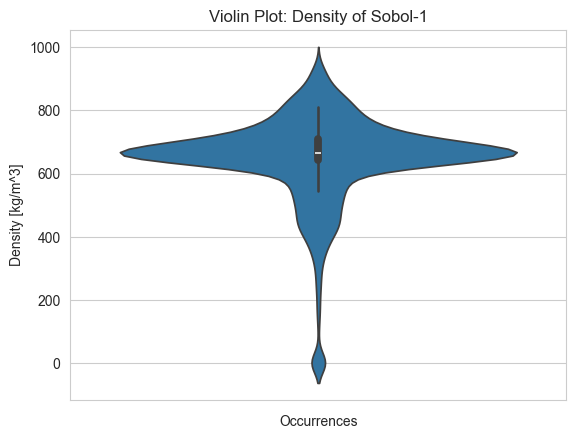

In [62]:
#df_data_training["density"]
violin_plot = sns.violinplot(data=df_data_training["density"])
violin_plot.set_title(f'Violin Plot: Density of {name_dataset}')
violin_plot.set_xticklabels([f''])
violin_plot.set_xlabel('Occurrences')
violin_plot.set_ylabel('Density [kg/m^3]')
fig = violin_plot.get_figure()
#violin_plot.title()
fig.savefig(f'violin_plot_density_{name_dataset}.png') 

## plot everything vs. density

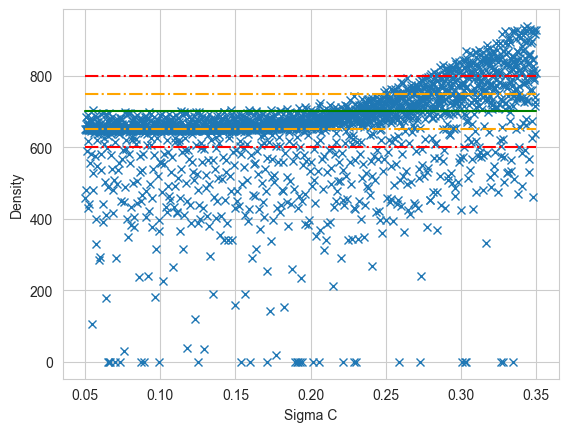

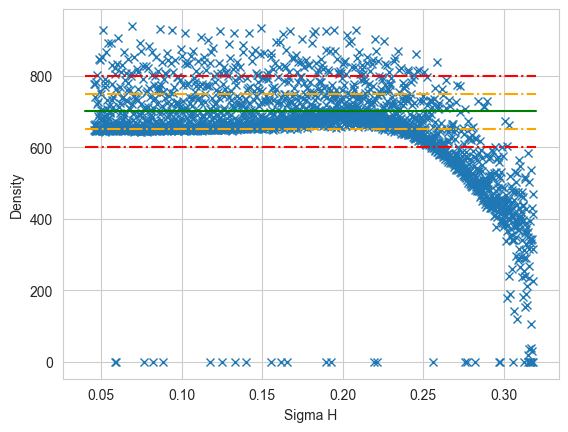

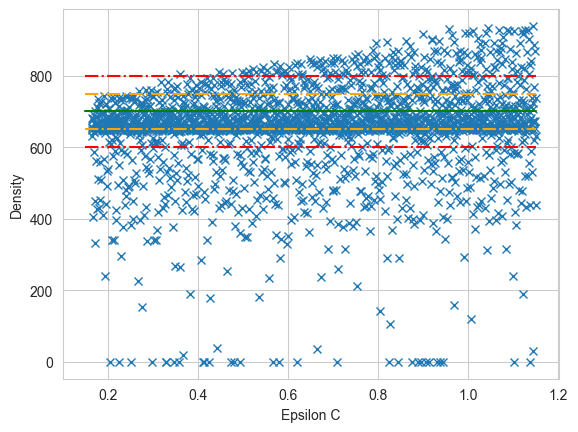

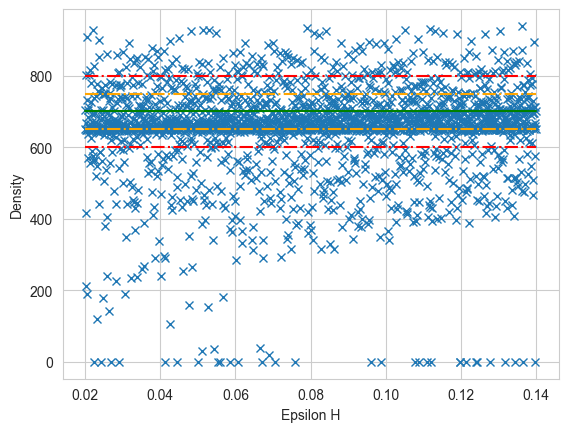

In [63]:
target = 700

uplim = 750
downlim = 650

upuplim = 800
downdownlim = 600

plt.figure()
plt.plot(df_data_training.SigC, df_data_training.density, 'x')
x0 = 0.05
x1 = 0.35
plt.plot([x0, x1], [target, target], '-', color='green')
plt.plot([x0, x1], [uplim, uplim], '-.', color='orange')
plt.plot([x0, x1], [downlim, downlim], '-.', color='orange')
plt.plot([x0, x1], [upuplim, upuplim], '-.', color='red')
plt.plot([x0, x1], [downdownlim, downdownlim], '-.', color='red')
plt.xlabel("Sigma C")
plt.ylabel("Density")

plt.figure()
plt.plot(df_data_training.SigH, df_data_training.density, 'x')
x0 = 0.04
x1 = 0.32
plt.plot([x0, x1], [target, target], '-', color='green')
plt.plot([x0, x1], [uplim, uplim], '-.', color='orange')
plt.plot([x0, x1], [downlim, downlim], '-.', color='orange')
plt.plot([x0, x1], [upuplim, upuplim], '-.', color='red')
plt.plot([x0, x1], [downdownlim, downdownlim], '-.', color='red')
plt.xlabel("Sigma H")
plt.ylabel("Density")

plt.figure()
plt.plot(df_data_training.EpsC, df_data_training.density, 'x')
x0 = 0.15
x1 = 1.15
plt.plot([x0, x1], [target, target], '-', color='green')
plt.plot([x0, x1], [uplim, uplim], '-.', color='orange')
plt.plot([x0, x1], [downlim, downlim], '-.', color='orange')
plt.plot([x0, x1], [upuplim, upuplim], '-.', color='red')
plt.plot([x0, x1], [downdownlim, downdownlim], '-.', color='red')
plt.xlabel("Epsilon C")
plt.ylabel("Density")

plt.figure()
plt.plot(df_data_training.EpsH, df_data_training.density, 'x')
x0 = 0.02
x1 = 0.14
plt.plot([x0, x1], [target, target], '-', color='green')
plt.plot([x0, x1], [uplim, uplim], '-.', color='orange')
plt.plot([x0, x1], [downlim, downlim], '-.', color='orange')
plt.plot([x0, x1], [upuplim, upuplim], '-.', color='red')
plt.plot([x0, x1], [downdownlim, downdownlim], '-.', color='red')
plt.xlabel("Epsilon H")
plt.ylabel("Density")


plt.show()


## plot everything vs. everything

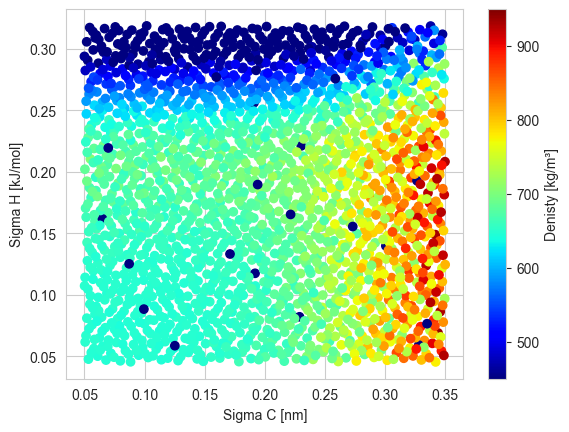

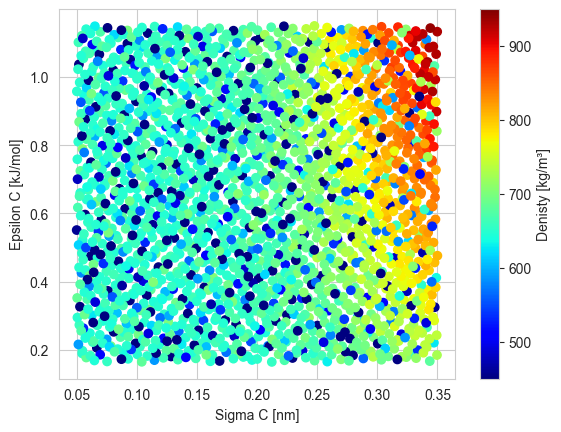

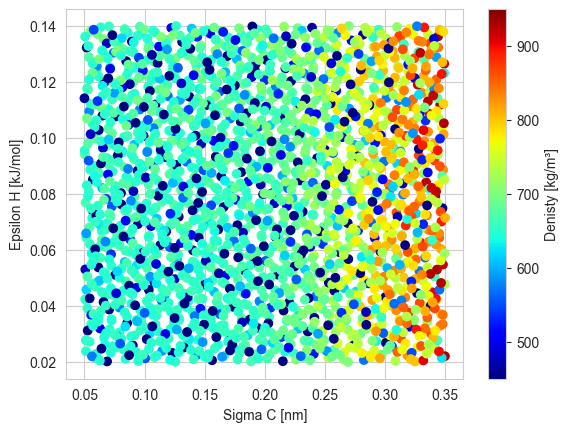

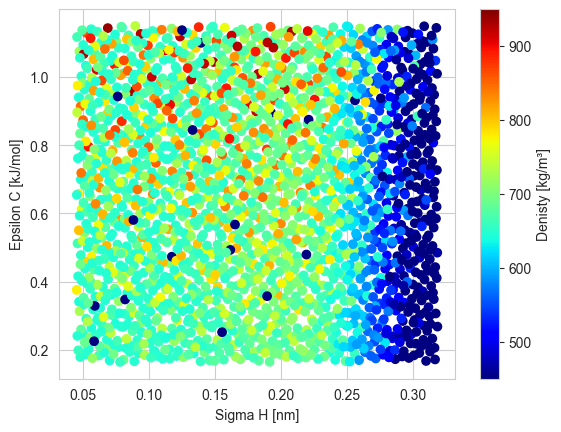

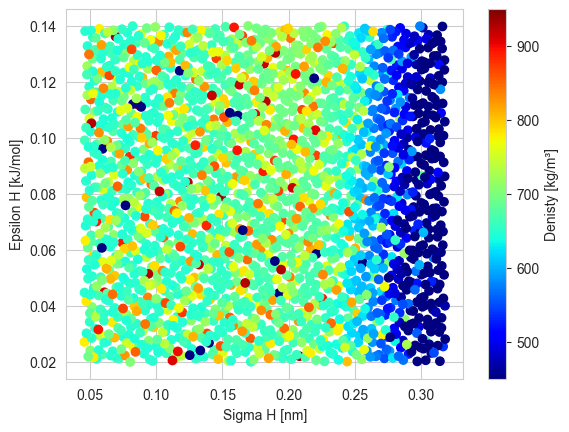

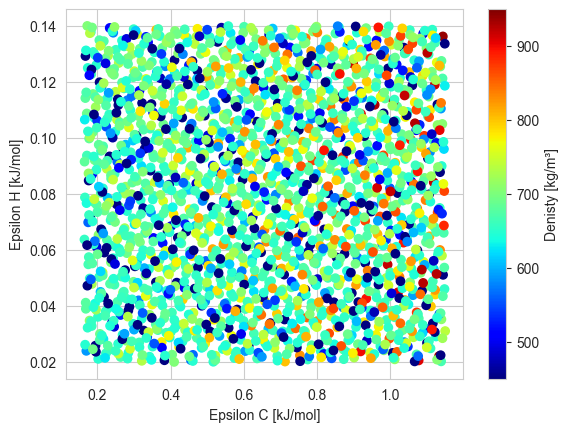

In [64]:
#print(df_data_training)
cm = plt.colormaps.get_cmap('RdYlBu')
cm = plt.colormaps.get_cmap('viridis')
cm = plt.colormaps.get_cmap('jet')
colormin = 450
colormax = 950

Z = np.array(df_data_training.density)
#print(Z)
#print(Z.shape)
#Z = np.eye(len(Z))*Z
#print(Z)

X = df_data_training.SigC
Y = df_data_training.SigH
#print(X)
#print(X.shape)
#print(Y)
#print(Y.shape)

plt.figure()
sc = plt.scatter(X, Y, c=Z, cmap=cm, vmin=colormin, vmax=colormax)
plt.xlabel("Sigma C [nm]")
plt.ylabel("Sigma H [kJ/mol]")
plt.colorbar(sc, label="Denisty [kg/m³]")
plt.savefig(f'HEATMAP_Dataset_{name_dataset}_SigCvsSigH.png')

X = df_data_training.SigC
Y = df_data_training.EpsC
plt.figure()
sc = plt.scatter(X, Y, c=Z, cmap=cm, vmin=colormin, vmax=colormax)
plt.xlabel("Sigma C [nm]")
plt.ylabel("Epsilon C [kJ/mol]")
plt.colorbar(sc, label="Denisty [kg/m³]")
plt.savefig(f'HEATMAP_Dataset_{name_dataset}_SigCvsEpsC.png')

X = df_data_training.SigC
Y = df_data_training.EpsH
plt.figure()
sc = plt.scatter(X, Y, c=Z, cmap=cm, vmin=colormin, vmax=colormax)
plt.xlabel("Sigma C [nm]")
plt.ylabel("Epsilon H [kJ/mol]")
plt.colorbar(sc, label="Denisty [kg/m³]")
plt.savefig(f'HEATMAP_Dataset_{name_dataset}_SigCvsEpsH.png')

X = df_data_training.SigH
Y = df_data_training.EpsC
plt.figure()
sc = plt.scatter(X, Y, c=Z, cmap=cm, vmin=colormin, vmax=colormax)
plt.xlabel("Sigma H [nm]")
plt.ylabel("Epsilon C [kJ/mol]")
plt.colorbar(sc, label="Denisty [kg/m³]")
plt.savefig(f'HEATMAP_Dataset_{name_dataset}_SigHvsEpsC.png')

X = df_data_training.SigH
Y = df_data_training.EpsH
plt.figure()
sc = plt.scatter(X, Y, c=Z, cmap=cm, vmin=colormin, vmax=colormax)
plt.xlabel("Sigma H [nm]")
plt.ylabel("Epsilon H [kJ/mol]")
plt.colorbar(sc, label="Denisty [kg/m³]")
plt.savefig(f'HEATMAP_Dataset_{name_dataset}_SigHvsEpsH.png')

X = df_data_training.EpsC
Y = df_data_training.EpsH
plt.figure()
sc = plt.scatter(X, Y, c=Z, cmap=cm, vmin=colormin, vmax=colormax)
plt.xlabel("Epsilon C [kJ/mol]")
plt.ylabel("Epsilon H [kJ/mol]")
plt.colorbar(sc, label="Denisty [kg/m³]")
plt.savefig(f'HEATMAP_Dataset_{name_dataset}_EpsCvsEpsH.png')


plt.show()

## find and drop density outliers

In [65]:
outliers = []
outliers446 = []
df_cleaned_data_training = df_data_training

for i, row in enumerate(df_data_training.index):
    #print(f'row: {row}\n')
    #print(f'df_data_training_cleaned.loc[row].density:\n{df_data_training_cleaned.loc[row].density}')
    density = df_data_training.loc[row].density
    #print(f'density: {density}')
    if density <= 200: #or density >= 800:
        #print("miau")
        #print(f'{df_data_training.loc[row].to_numpy().tolist()}')
        outliers.append(df_data_training.loc[row].to_numpy().tolist())
        df_cleaned_data_training = df_cleaned_data_training.drop(index=row)
    if abs(446.0-abs(density)) < 1.0: 
        outliers446.append(df_data_training.loc[row].to_numpy().tolist())
        df_cleaned_data_training = df_cleaned_data_training.drop(index=row)
    #if row == 10:
    #    break
        
#print(f'{outliers}')
#print(f'{df_cleaned_data_training}')

## Histogram cleaned data

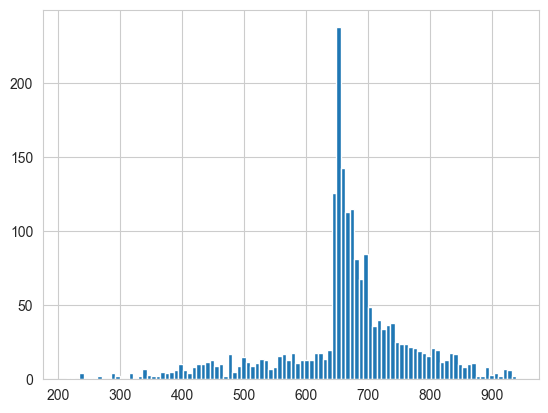

In [66]:
n_bins = 1000
plt.figure()
#plt.hist(df_data_training['density'], bins=n_bins)
plt.hist(df_cleaned_data_training['density'], bins=100)
plt.show()

## violin plot

C:\Users\W0rsth0rst\AppData\Local\Temp\ipykernel_13344\2704516677.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  violin_plot_cleaned.set_xticklabels([f''])


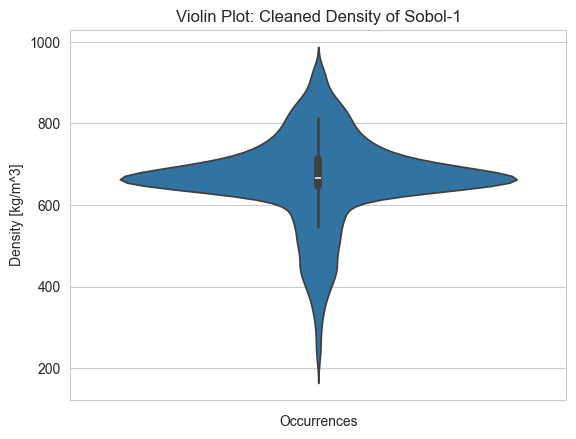

In [67]:
#df_data_training["density"]
violin_plot_cleaned = sns.violinplot(data=df_cleaned_data_training['density'])
violin_plot_cleaned.set_title(f'Violin Plot: Cleaned Density of {name_dataset}')
violin_plot_cleaned.set_xticklabels([f''])
violin_plot_cleaned.set_xlabel('Occurrences')
violin_plot_cleaned.set_ylabel('Density [kg/m^3]')
fig = violin_plot_cleaned.get_figure()
#violin_plot.title()
fig.savefig(f'violin_plot_density_{name_dataset}_cleaned.png')

## plot everything vs. everything, cleaned data

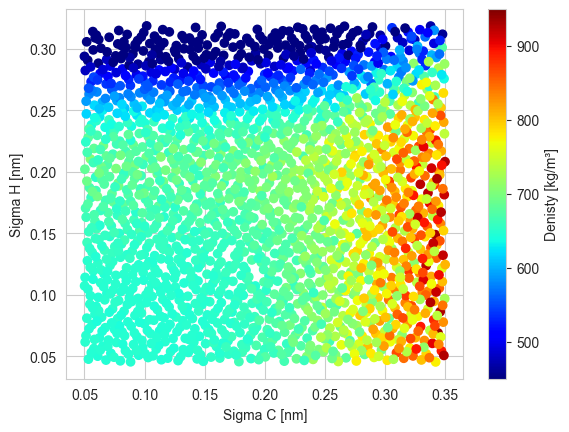

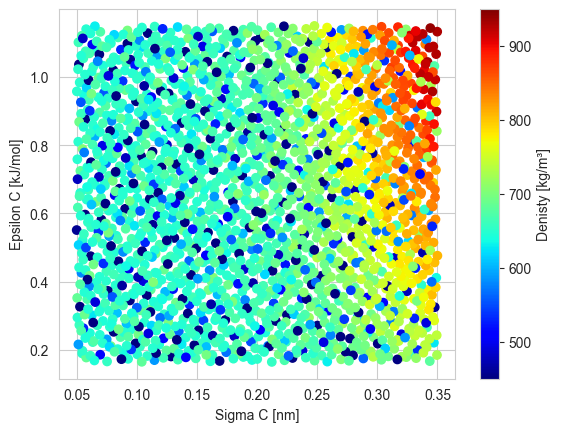

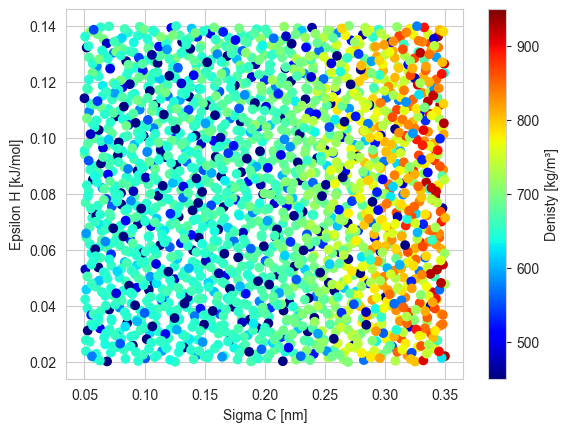

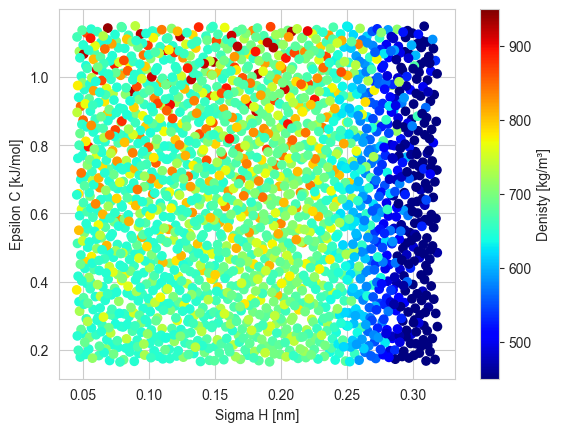

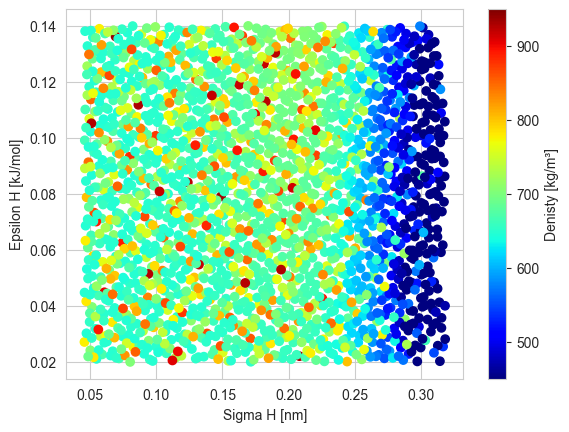

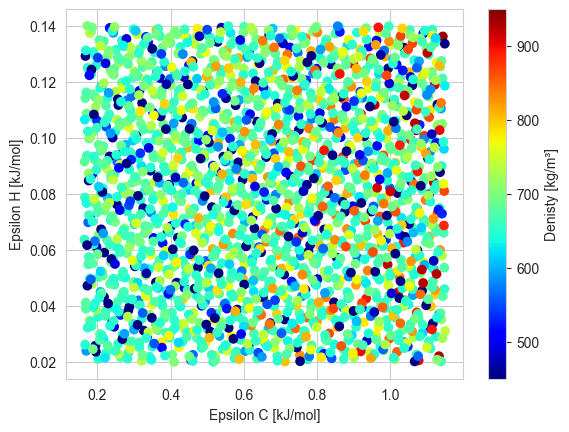

In [68]:
#print(df_data_training)
cm = plt.colormaps.get_cmap('RdYlBu')
cm = plt.colormaps.get_cmap('viridis')
cm = plt.colormaps.get_cmap('jet')
colormin = 450
colormax = 950

Z = np.array(df_cleaned_data_training.density)
#print(Z)
#print(Z.shape)
#Z = np.eye(len(Z))*Z
#print(Z)

X = df_cleaned_data_training.SigC
Y = df_cleaned_data_training.SigH
#print(X)
#print(X.shape)
#print(Y)
#print(Y.shape)

plt.figure()
sc = plt.scatter(X, Y, c=Z, cmap=cm, vmin=colormin, vmax=colormax)
plt.xlabel("Sigma C [nm]")
plt.ylabel("Sigma H [nm]")
plt.colorbar(sc, label="Denisty [kg/m³]")
plt.savefig(f'HEATMAP_Dataset_{name_dataset}_SigCvsSigH_cleaned.png')

X = df_cleaned_data_training.SigC
Y = df_cleaned_data_training.EpsC
plt.figure()
sc = plt.scatter(X, Y, c=Z, cmap=cm, vmin=colormin, vmax=colormax)
plt.xlabel("Sigma C [nm]")
plt.ylabel("Epsilon C [kJ/mol]")
plt.colorbar(sc, label="Denisty [kg/m³]")
plt.savefig(f'HEATMAP_Dataset_{name_dataset}_SigCvsEpsC_cleaned.png')

X = df_cleaned_data_training.SigC
Y = df_cleaned_data_training.EpsH
plt.figure()
sc = plt.scatter(X, Y, c=Z, cmap=cm, vmin=colormin, vmax=colormax)
plt.xlabel("Sigma C [nm]")
plt.ylabel("Epsilon H [kJ/mol]")
plt.colorbar(sc, label="Denisty [kg/m³]")
plt.savefig(f'HEATMAP_Dataset_{name_dataset}_SigCvsEpsH_cleaned.png')

X = df_cleaned_data_training.SigH
Y = df_cleaned_data_training.EpsC
plt.figure()
sc = plt.scatter(X, Y, c=Z, cmap=cm, vmin=colormin, vmax=colormax)
plt.xlabel("Sigma H [nm]")
plt.ylabel("Epsilon C [kJ/mol]")
plt.colorbar(sc, label="Denisty [kg/m³]")
plt.savefig(f'HEATMAP_Dataset_{name_dataset}_SigHvsEpsC_cleaned.png')

X = df_cleaned_data_training.SigH
Y = df_cleaned_data_training.EpsH
plt.figure()
sc = plt.scatter(X, Y, c=Z, cmap=cm, vmin=colormin, vmax=colormax)
plt.xlabel("Sigma H [nm]")
plt.ylabel("Epsilon H [kJ/mol]")
plt.colorbar(sc, label="Denisty [kg/m³]")
plt.savefig(f'HEATMAP_Dataset_{name_dataset}_SigHvsEpsH_cleaned.png')

X = df_cleaned_data_training.EpsC
Y = df_cleaned_data_training.EpsH
plt.figure()
sc = plt.scatter(X, Y, c=Z, cmap=cm, vmin=colormin, vmax=colormax)
plt.xlabel("Epsilon C [kJ/mol]")
plt.ylabel("Epsilon H [kJ/mol]")
plt.colorbar(sc, label="Denisty [kg/m³]")
plt.savefig(f'HEATMAP_Dataset_{name_dataset}_EpsCvsEpsH_cleaned.png')


plt.show()

## plot outliers (vs density?)

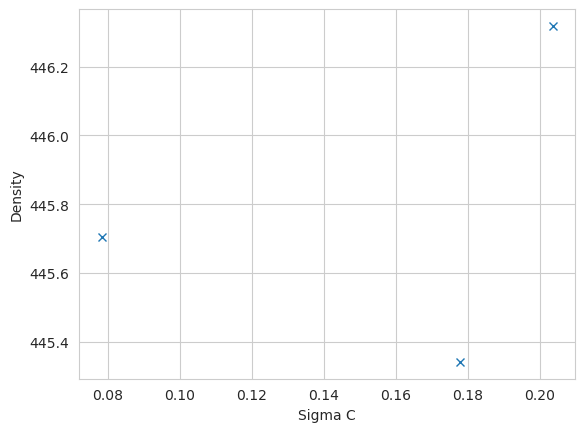

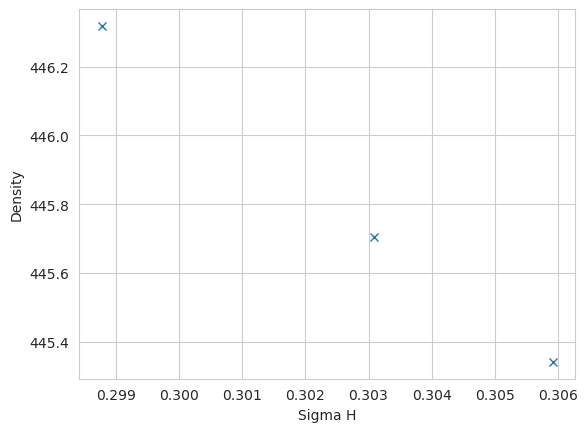

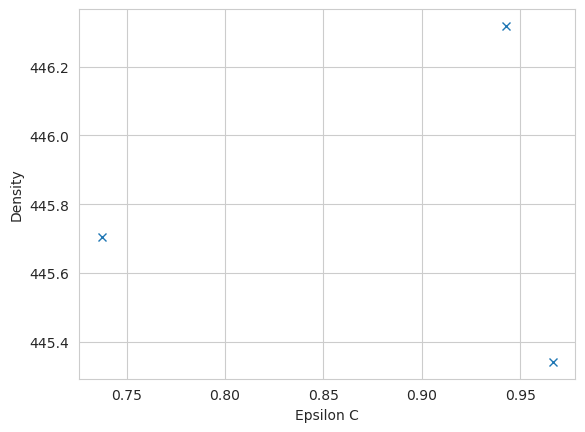

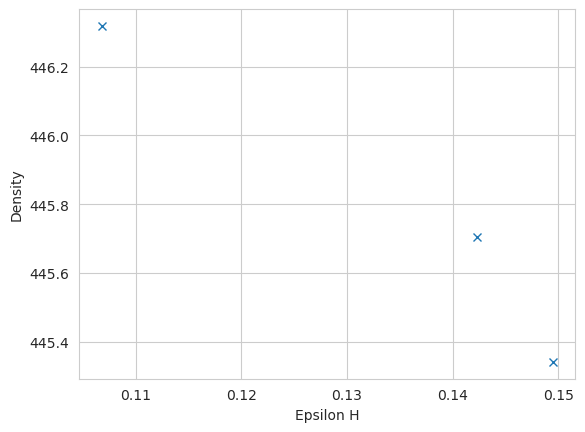

In [13]:
SigC = []
SigH = []
EpsC = []
EpsH = []
Dens = []

#print(f'{outliers446}')
#print(f'{outliers}')
if True:
    for i in range(0, len(outliers446)):
        SigC.append(outliers446[i][0])
        SigH.append(outliers446[i][1])
        EpsC.append(outliers446[i][2])
        EpsH.append(outliers446[i][3])
        Dens.append(outliers446[i][4])
else:
    for i in range(0, len(outliers)):
        SigC.append(outliers[i][0])
        SigH.append(outliers[i][1])
        EpsC.append(outliers[i][2])
        EpsH.append(outliers[i][3])
        Dens.append(outliers[i][4])

    
plt.figure()
plt.plot(SigC, Dens, 'x')
plt.xlabel("Sigma C")
plt.ylabel("Density")

plt.figure()
plt.plot(SigH, Dens, 'x')
plt.xlabel("Sigma H")
plt.ylabel("Density")

plt.figure()
plt.plot(EpsC, Dens, 'x')
plt.xlabel("Epsilon C")
plt.ylabel("Density")

plt.figure()
plt.plot(EpsH, Dens, 'x')
plt.xlabel("Epsilon H")
plt.ylabel("Density")


plt.show()

## save cleaned data

In [14]:
df_cleaned_data_training.to_csv('cleaned_data.csv')